In [36]:
import cv2
import numpy as np
import pygame

import hashlib
import base64
from moviepy.editor import VideoFileClip
from scipy.misc import imresize


from matplotlib import pyplot
import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

In [2]:
from io import BytesIO

def display_pil_image(image):
    b = BytesIO()
    image.save(b, format='png')
    data = b.getvalue()

    ip_img = display.Image(data=data, format='png', embed=True)

    display.clear_output(wait=True)
    display.display(ip_img)

In [63]:
def downsample_image(img):
    return imresize(img, size=(720, 1280), interp='nearest')

def cleanup(image):
    binary_output = np.zeros_like(image)
    binary_output[image >= 5] = 1
    return binary_output

def h6(w):
    h = hashlib.md5(cleanup(w)).digest()
    return base64.b64encode(h)[:6].lower().decode("utf-8")

def grayConversion(image):
    grayValue = 0.07 * image[:,:,2] + 0.72 * image[:,:,1] + 0.21 * image[:,:,0]
    gray_img = grayValue.astype(np.uint8)
    return gray_img

In [38]:
def getGamebox(image):
    (x, y, x1, y1) = GAMEBOX
    return image[x:x1, y:y1]

In [39]:
def overlayText(image, text, location, size=3, weight=8, color=(255,255,255)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, location, font, size, color, weight)
    return image

In [107]:
def process(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in enumerate(contours):
        (x,y,w,h) = cv2.boundingRect(contour[1])

        snip = image[y:y+h, x:x+w]
        digest = h6(snip)
        overlayText(image, digest, (x, y+50), 0.5, 1)
        cv2.rectangle(image, (x,y), (x+w,y+h), (255, 255, 255), 2)
        np.set_printoptions(threshold=np.nan)
        #print("{}: {}".format(digest, snip))
        imshow(snip, cmap='gray')
                
    return image

In [108]:
def process_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gamebox = getGamebox(gray)
    processed = process(gamebox)
    return processed

(497, 669)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 2

<Figure size 2160x2880 with 0 Axes>

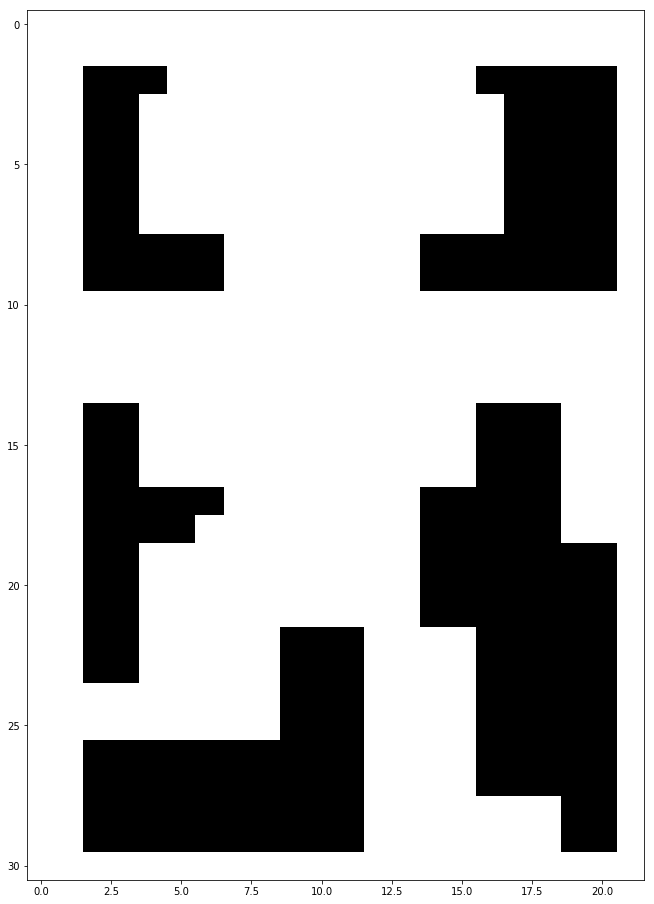

<Figure size 2160x2880 with 0 Axes>

In [111]:
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/clip.flv')

frame = clip.get_frame(2.0)
ds = downsample_image(frame)
crop = ds[112:609, 307:976]
gray = grayConversion(crop)
ret,thresh = cv2.threshold(gray,27,255,0)
print(thresh.shape)
print(thresh)

tagged = process(thresh)

from matplotlib.pyplot import imshow, figure 
figure(figsize = (30,40))
#imshow(tagged, cmap='gray')
#pf = process_frame(frame)
#frame.ipython_display(pf)

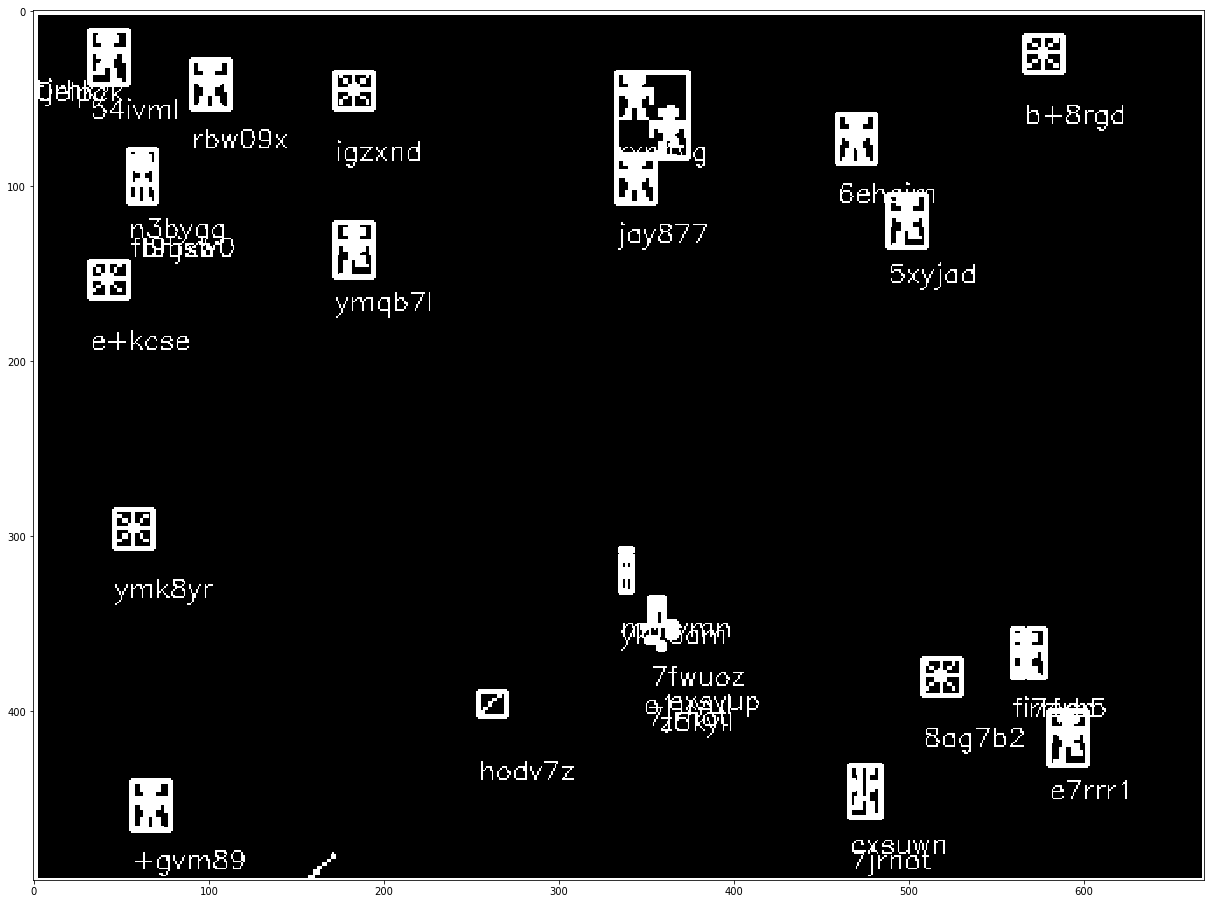

In [106]:
imshow(tagged, cmap="gray")

In [ ]:
clip = VideoFileClip('/home/strider/Videos/clip.flv')
challenge_clip = clip.fl_image(process_frame)
%time challenge_clip.write_videofile('/home/strider/Videos/clip_out.flv', audio=False)

In [ ]:
GAMEBOX = [114, 309, 608, 975]

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

i = 0
while True:    
    ret, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gamebox = getGamebox(gray)
    processed = process(gamebox)
    rgb = Image.fromarray(processed, "L")
    display_pil_image(rgb)
    
    i += 1
    if i > 1:
        break
        
cap.release()